In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit

algorithm_globals.random_seed = 5

[[ 0.61000585  0.61588158]
 [ 0.03065112 -0.42839724]
 [-0.8921386  -0.23326224]
 [-0.18305359 -0.90944961]
 [-0.90248458  0.99835223]
 [ 0.30473822 -0.5309796 ]
 [-0.1301049   0.94837239]
 [ 0.79535522  0.68846208]
 [-0.21519067 -0.01395396]
 [ 0.3533787  -0.87839457]
 [ 0.11119223 -0.45709679]
 [ 0.75930235 -0.87157113]
 [ 0.35836307  0.740177  ]
 [-0.54536295  0.79089648]
 [ 0.74439094 -0.96296556]
 [ 0.41499113 -0.99760063]
 [ 0.00672793 -0.1266659 ]
 [-0.59349433 -0.35011471]
 [ 0.61243066 -0.36709583]
 [-0.70192283  0.39702398]]

[1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0]
[ 1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
[0.61000585 0.61588158]
1
[ 0.03065112 -0.42839724]
-1
[-0.8921386  -0.23326224]
-1
[-0.18305359 -0.90944961]
-1
[-0.90248458  0.99835223]
1
[ 0.30473822 -0.5309796 ]
-1
[-0

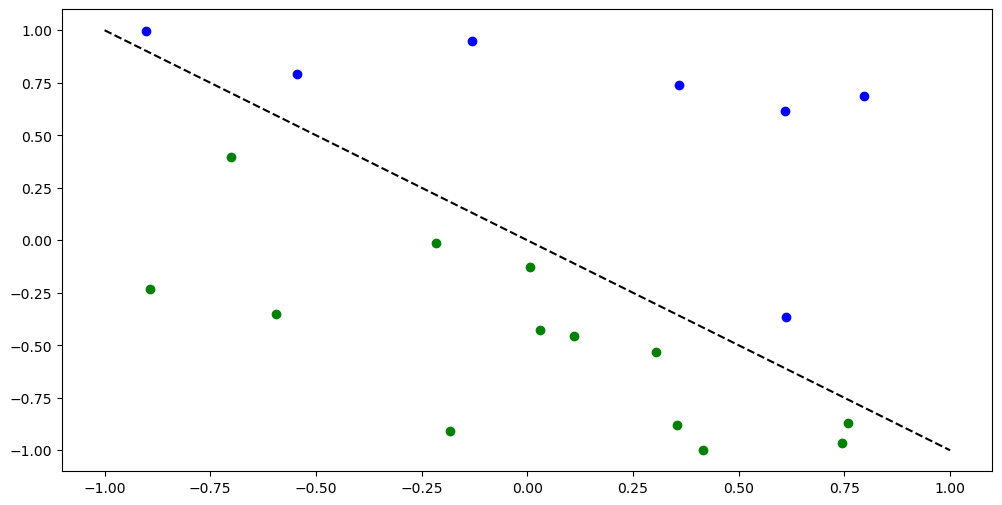

In [138]:
num_inputs = 2
num_samples = 20
X = 2*algorithm_globals.random.random([num_samples, num_inputs]) -1

print(X)
print()

y01 = 1*(np.sum(X, axis=1) >= 0)
y = 2*y01 - 1
print(y01)
print(y)

y_one_hot = np.zeros((num_samples, 2))
for i in range(num_samples):
    y_one_hot[i, y01[i]] = 1
    
print(y_one_hot)

for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
        print(x)
        print(y_target)
    else:
        plt.plot(x[0], x[1], "go")
        print(x)
        print(y_target)

plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

C:\Users\Parvez-PC\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


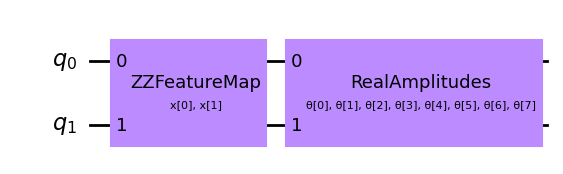

In [139]:
qc = QNNCircuit(num_qubits=2)
qc.draw('mpl')

In [140]:
estimator_qnn = EstimatorQNN(circuit=qc)

In [141]:
estimator_qnn.forward(X[0,:], algorithm_globals.random.random(estimator_qnn.num_weights))

array([[-0.17703773]])

In [142]:
def callback_graph(weights, ob_func):
    clear_output(wait=True)
    objective_func_vals.append(ob_func)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
    

In [143]:
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, optimizer=COBYLA(maxiter=2), callback=callback_graph)

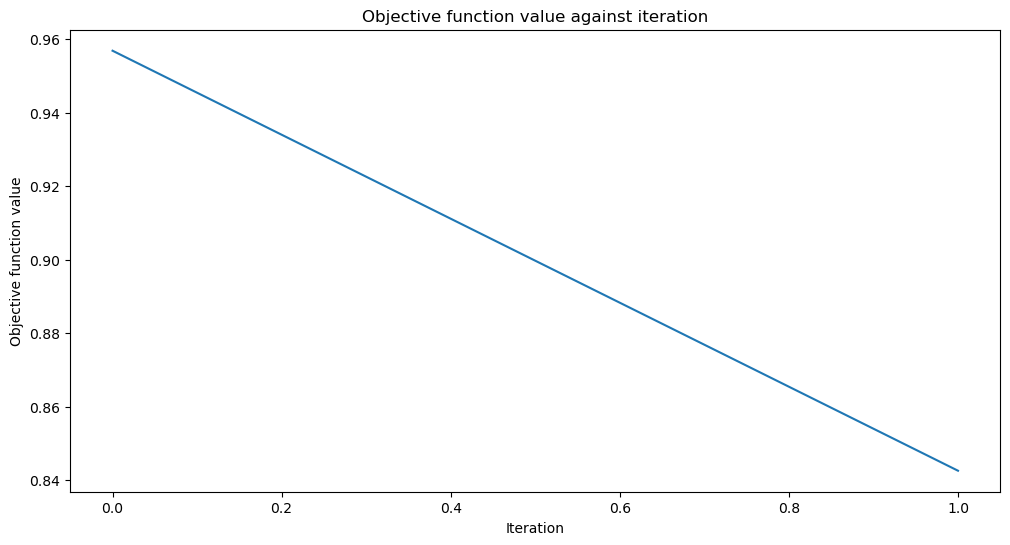

0.7

In [144]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)
estimator_classifier.fit(X, y)

estimator_classifier.score(X, y)

[[ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]]


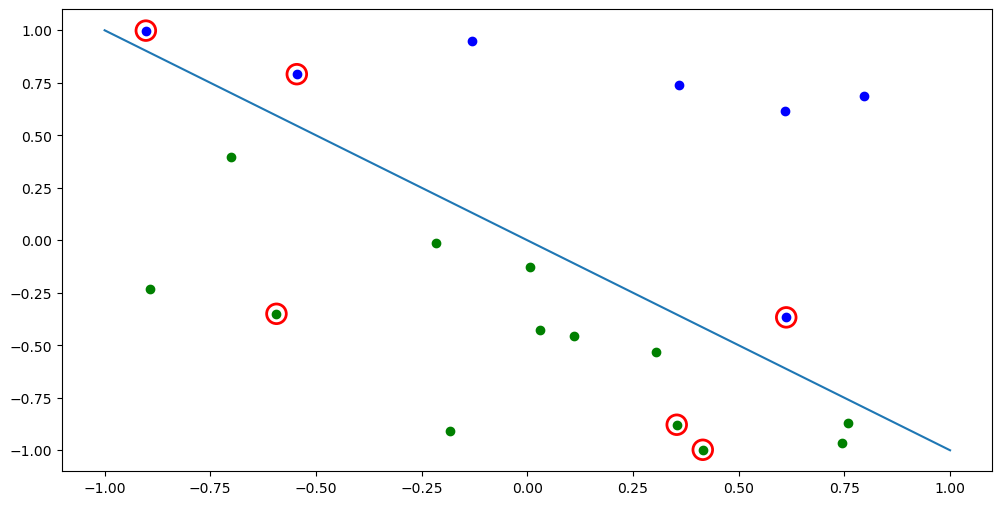

In [145]:
y_predict = estimator_classifier.predict(X)
print(y_predict)
# plot results
# red == wrongly classified
for x, y_target, y_p in zip(X, y, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1])
plt.show()

In [146]:
estimator_classifier.weights

array([1.01453628, 0.9332239 , 0.08582579, 0.8449268 , 0.36788074,
       0.95102298, 0.39942526, 0.93644206])

In [1]:
import qiskit
versions = qiskit.__qiskit_version__
print("The version of Qiskit is",versions['qiskit'])
print()
print("The version of each component:")
for key in versions:
    print(key,"->",versions[key])

The version of Qiskit is 0.45.0

The version of each component:
qiskit -> 0.45.0
qiskit-aer -> 0.13.0
qiskit-ignis -> None
qiskit-ibmq-provider -> None
qiskit-nature -> None
qiskit-finance -> None
qiskit-optimization -> None
qiskit-machine-learning -> 0.7.1


C:\Users\Parvez-PC\AppData\Local\Temp\ipykernel_728\3518098202.py:3: DeprecationWarning: qiskit.__qiskit_version__ is deprecated since Qiskit Terra 0.25.0, and will be removed 3 months or more later. Instead, you should use qiskit.__version__. The other packages listed in theformer qiskit.__qiskit_version__ have their own __version__ module level dunder, as standard in PEP 8.
  print("The version of Qiskit is",versions['qiskit'])


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
import pandas as pd

In [151]:
salary_data = pd.read_csv('Salary_data.csv')
X = salary_data.iloc[:, :-1].values
Y = salary_data.iloc[:, 1].values

In [156]:
salary_data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


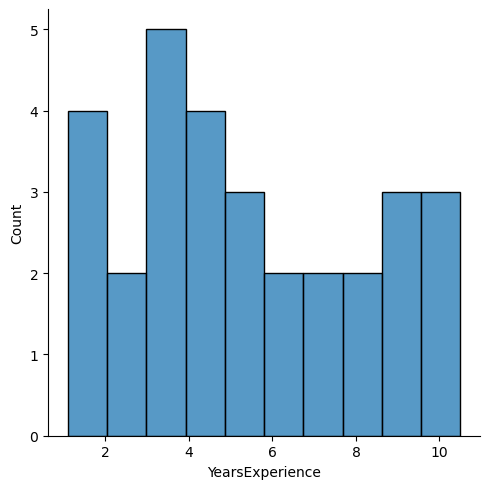

In [166]:
 sns.displot(salary_data['YearsExperience'], kde=False, bins= 10)

<Axes: >

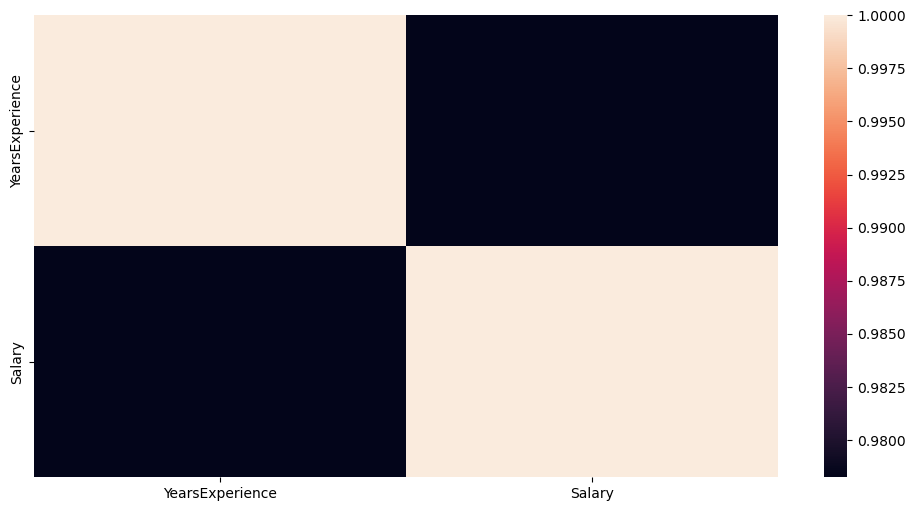

In [167]:
sns.heatmap(salary_data.corr())

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [176]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
 

LinearRegression()

In [178]:
y_pred = model.predict(X_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

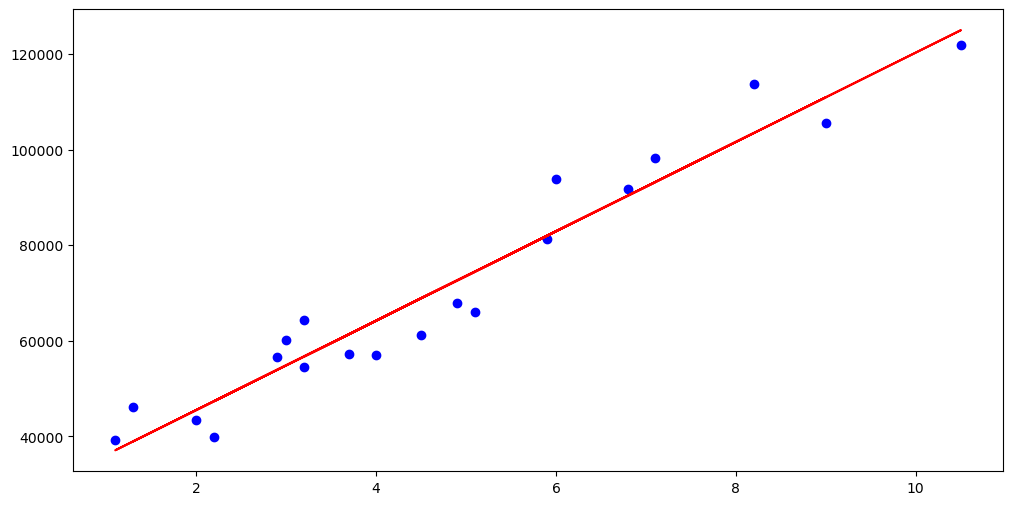

In [181]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.predict(X_train), color='red')
plt.show()

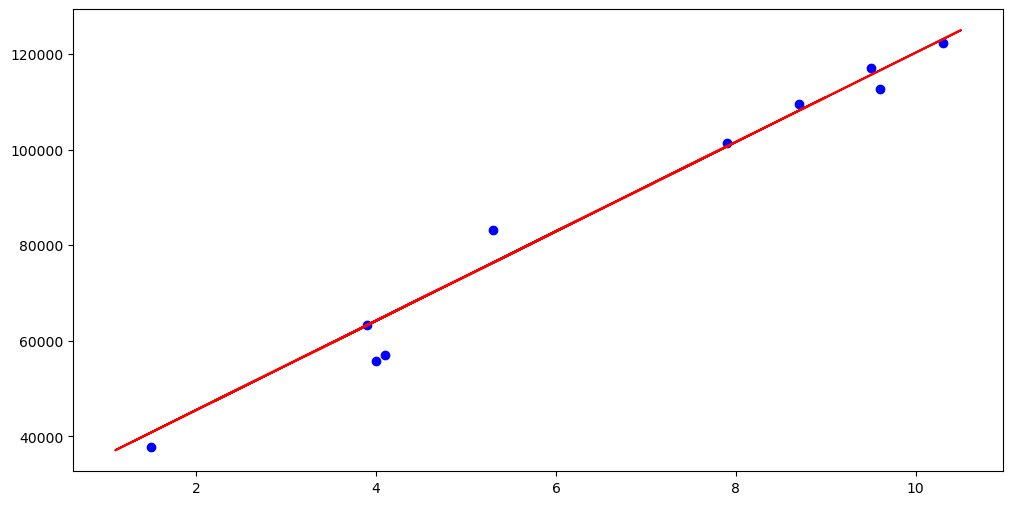

In [182]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, model.predict(X_train), color='red')
plt.show()

In [4]:
dataset = pd.read_csv('SocialNetworkAds.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
X = dataset.iloc[:, [2,3]].values
Y = dataset.iloc[:, 4].values

C:\Users\Parvez-PC\AppData\Local\Temp\ipykernel_6160\2676893432.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

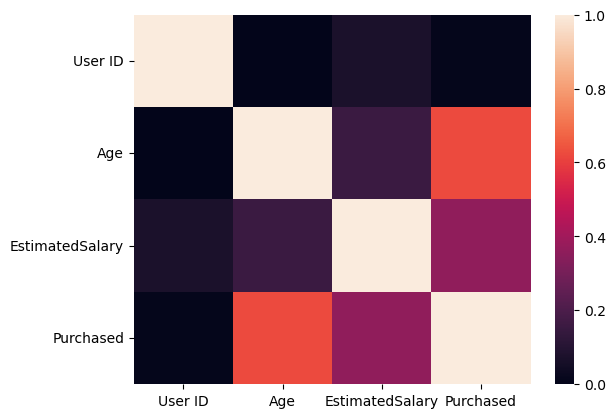

In [6]:
sns.heatmap(dataset.corr())

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 1/3, random_state = 1)

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
xtrain = sc_X.fit_transform(xtrain)
xtest = sc_X.transform(xtest)

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [13]:
ypred = classifier.predict(xtest)
ypred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1], dtype=int64)

In [14]:
from matplotlib.colors import ListedColormap
xset, yset = xtrain, ytrain


In [16]:
plt.scatter(xtrain(axes=1), ytrain, color='blue')
plt.plot(xtrain(axes=1), classifier.predict(xtrain), color='red')
plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [196]:
from sklearn.datasets import load_iris

dataset = load_iris()

In [17]:
def QML_Classifiers(dataset):
    
    from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
    from qiskit_algorithms.optimizers import COBYLA
    from qiskit.primitives import Sampler
    import time
    from qiskit_machine_learning.algorithms.classifiers import VQC
    from sklearn.model_selection import train_test_split
    from qiskit_algorithms.utils import algorithm_globals
    from sklearn.preprocessing import MinMaxScaler
    from matplotlib import pyplot as plt
    from IPython.display import clear_output

    
    features = dataset.data  # this need to be properly defined, if your data is not in data and label form split 
    labels = dataset.target  # it into arrays change this features and label to make it two diff arrays
    features = MinMaxScaler().fit_transform(features)
    
    algorithm_globals.random_seed = 123
    train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels, train_size=0.7, random_state=algorithm_globals.random_seed
    )

    num_features = features.shape[1]

    feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
    feature_map.decompose()
     
    ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
    ansatz.decompose()
    
    optimizer = COBYLA(maxiter=100)
    sampler = Sampler()
    
    objective_func_vals = []
    plt.rcParams["figure.figsize"] = (12, 6)
    
    def callback_graph(weights, obj_func):
        clear_output(wait=True)
        objective_func_vals.append(obj_func)
        plt.title("Objective function value against iteration")
        plt.xlabel("Iteration")
        plt.ylabel("Objective function value")
        plt.plot(range(len(objective_func_vals)), objective_func_vals)
        plt.show()
        
    vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
    )
    
    objective_func_vals = []
    start = time.time()
    vqc.fit(train_features, train_labels)
    elapsed = time.time() - start
    
    print(f"Training time: {round(elapsed)} seconds")
    
    train_score = vqc.score(train_features, train_labels)
    test_score = vqc.score(test_features, test_labels)
    from sklearn.metrics import mean_squared_error, r2_score
    
    pred_train_features = vqc.predict(train_features)
    pred_test_features = vqc.predict(test_features)

    train_mse = mean_squared_error(train_labels, pred_train_features)
    test_mse = mean_squared_error(test_labels, pred_test_features)
    train_r2 = r2_score(train_labels, pred_train_features)
    test_r2 = r2_score(test_labels, pred_test_features)
    
    from sklearn import metrics
    confusion_matrix = metrics.confusion_matrix(train_labels, pred_train_features)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
    
    print("Train Score = ",train_score) 
    print("Test Score = ",test_score)
    print("Train Mean Squared Error = ",train_mse) 
    print("Test Mean Squared Error = ",test_mse)
    print("Train r2 Score = ",train_r2) 
    print("Test r2 Score = ",test_r2)

    cm_display.plot()
    plt.show()

    


In [18]:
QML_Classifiers(dataset)

AttributeError: 'DataFrame' object has no attribute 'data'

In [ ]:
ypred = vqc.predict()

In [19]:
Car_data = pd.read_csv('SocialNetworkAds.csv')
data = Car_data.iloc[:, [2,3]].values
target = Car_data.iloc[:, 4].values
Dict = {'data': data, 'target': target}
Dict
Car_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [20]:
features = Dict['data']
labels = Dict['target']

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [21]:
def QML_Classification(Dataset, Features, Labels):
    
    from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, EfficientSU2
    from qiskit_algorithms.optimizers import COBYLA
    from qiskit.primitives import Sampler
    import time
    from qiskit_machine_learning.algorithms.classifiers import VQC
    from sklearn.model_selection import train_test_split
    from qiskit_algorithms.utils import algorithm_globals
    from sklearn.preprocessing import MinMaxScaler
    from matplotlib import pyplot as plt
    from IPython.display import clear_output
    import numpy

    
    features = Features  # this need to be properly defined, if your data is not in data and label form split 
    labels = Labels  # it into arrays change this features and label to make it two diff arrays
    features = MinMaxScaler().fit_transform(features)
    
    algorithm_globals.random_seed = numpy.random.randint(1,100)
    train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels, train_size=0.7, random_state=algorithm_globals.random_seed
    )

    num_features = features.shape[1]

    feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
    feature_map.decompose()
    
    
    ansatz = EfficientSU2(num_qubits=num_features, reps=3)
    ansatz.decompose()
    
    
    optimizer = COBYLA(maxiter=100)
    sampler = Sampler()
    
    objective_func_vals = []
    plt.rcParams["figure.figsize"] = (12, 6)
    
    def callback_graph(weights, obj_func):
        clear_output(wait=True)
        objective_func_vals.append(obj_func)
        plt.title("Objective function value against iteration")
        plt.xlabel("Iteration")
        plt.ylabel("Objective function value")
        plt.plot(range(len(objective_func_vals)), objective_func_vals)
        plt.show()
        
    vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
    )
    
    objective_func_vals = []
    start = time.time()
    vqc.fit(train_features, train_labels)
    elapsed = time.time() - start
    
    print(f"Training time: {round(elapsed)} seconds")
    
    train_score = vqc.score(train_features, train_labels)
    test_score = vqc.score(test_features, test_labels)
    from sklearn.metrics import mean_squared_error, r2_score
    
    pred_train_features = vqc.predict(train_features)
    pred_test_features = vqc.predict(test_features)

    train_mse = mean_squared_error(train_labels, pred_train_features)
    test_mse = mean_squared_error(test_labels, pred_test_features)
    train_r2 = r2_score(train_labels, pred_train_features)
    test_r2 = r2_score(test_labels, pred_test_features)
    
    from sklearn import metrics
    confusion_matrix = metrics.confusion_matrix(train_labels, pred_train_features)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
    
    print("algorithm_globals.random seed =", algorithm_globals.random_seed)
    print("Train Score = ",train_score) 
    print("Test Score = ",test_score)
    print("Train Mean Squared Error = ",train_mse) 
    print("Test Mean Squared Error = ",test_mse)
    print("Train r2 Score = ",train_r2) 
    print("Test r2 Score = ",test_r2)

    cm_display.plot()
    display(feature_map.decompose().draw('mpl'))
    display(ansatz.decompose().draw('mpl'))
     
    plt.show()

    


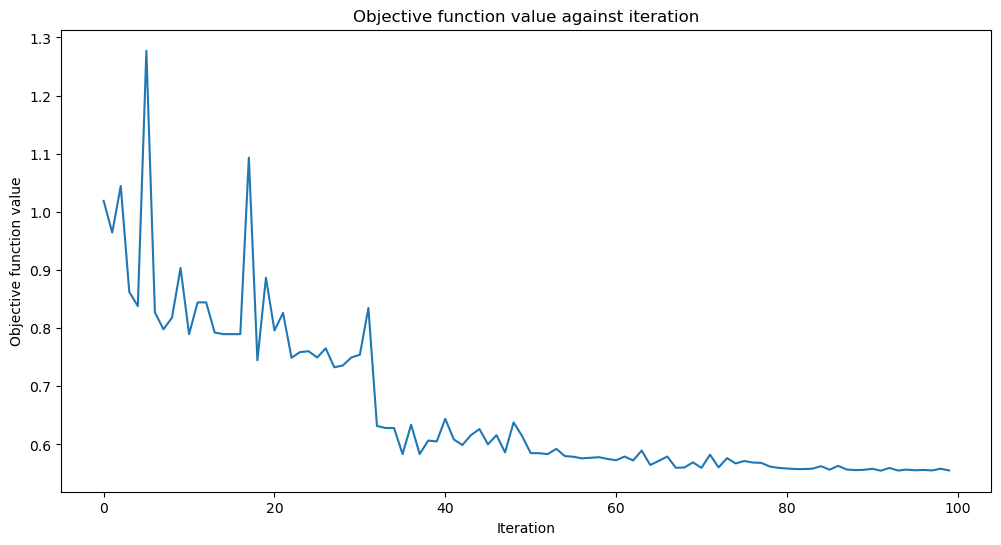

Training time: 206 seconds
algorithm_globals.random seed = 76
Train Score =  0.8035714285714286
Test Score =  0.8833333333333333
Train Mean Squared Error =  0.19642857142857142
Test Mean Squared Error =  0.11666666666666667
Train r2 Score =  0.1552849541988921
Test r2 Score =  0.4750000000000001


C:\Users\Parvez-PC\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


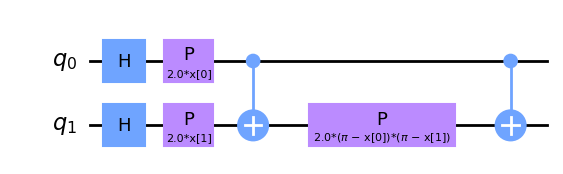

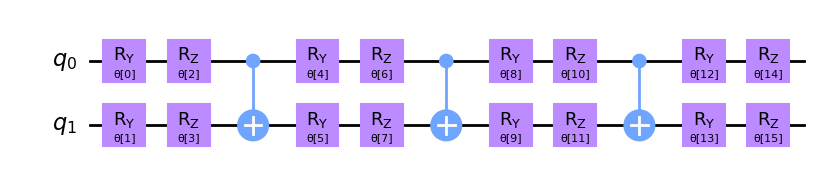

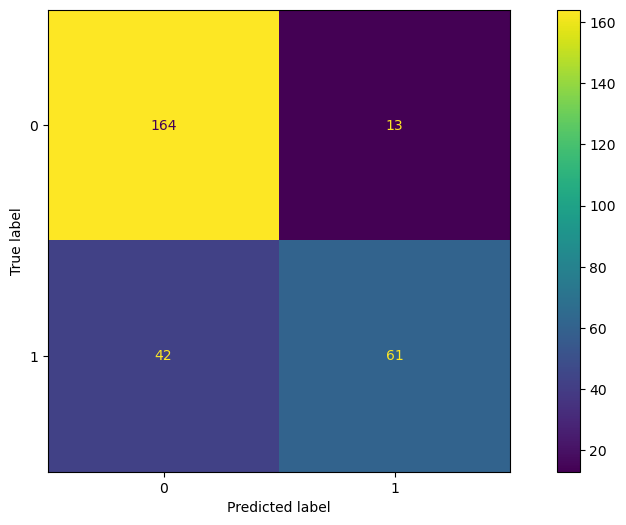

In [22]:
QML_Classification(Dict, features, labels)